In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels')

Found 223216 files for prediction set


In [24]:
sonufy = Sonufy(latent_dims=64, output_size=(64,64))

In [61]:
sonufy.build_model(filters=(16,32,64,256))
# sonufy.build_model()

In [62]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 392s 511ms/step - loss: 0.0173 - val_loss: 0.0134
Epoch 2/10
765/765 [==============================] - 395s 517ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 3/10
104/765 [===>..........................] - ETA: 5:40 - loss: 0.0120

KeyboardInterrupt: 

In [27]:
model_path = 'data/test_64dim_robust'

sonufy.save_encoder(model_path)
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save(model_path)

2022-09-08 17:12:09.736 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-08 17:12:09.962 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp1djtqb2v/assets
2022-09-08 17:12:11.024153: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-08 17:12:11.024188: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-08 17:12:11.024776: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp1djtqb2v
2022-09-08 17:12:11.028632: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-08 17:12:11.028638: I tens

Encoder saved to "data/test_64dim_robust".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 223216 / 223216

6.18 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.09 minutes elapsed
Building genre distributions...
[============================================================>] 223216 / 223216

Genre distributions built. 0.85 minutes elapsed
Latent Space Built.


2022-09-08 17:19:23.708 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 10). These functions will not be directly callable after loading.
2022-09-08 17:19:24.301 INFO    tensorflow: Assets written to: data/test_64dim_robust/assets


Model saved to "data/test_64dim_robust".
saved full model


2022-09-08 17:19:25.222 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-08 17:19:25.446 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpalp5_19d/assets
2022-09-08 17:19:26.403271: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-08 17:19:26.403294: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-08 17:19:26.403400: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpalp5_19d
2022-09-08 17:19:26.407317: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-08 17:19:26.407333: I tens

Encoder saved to "data/test_64dim_robust".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_64dim_robust.


In [ ]:
# sonufy.load('data/test_128dim_newmels/')

In [ ]:
test_img = adg.take(5)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

In [ ]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

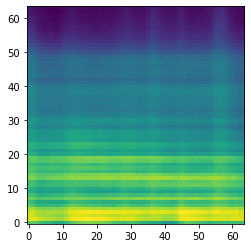

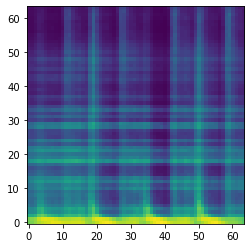

In [29]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

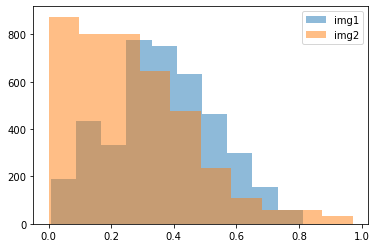

In [30]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

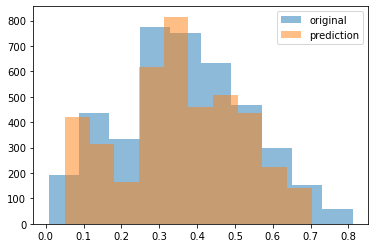

In [31]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

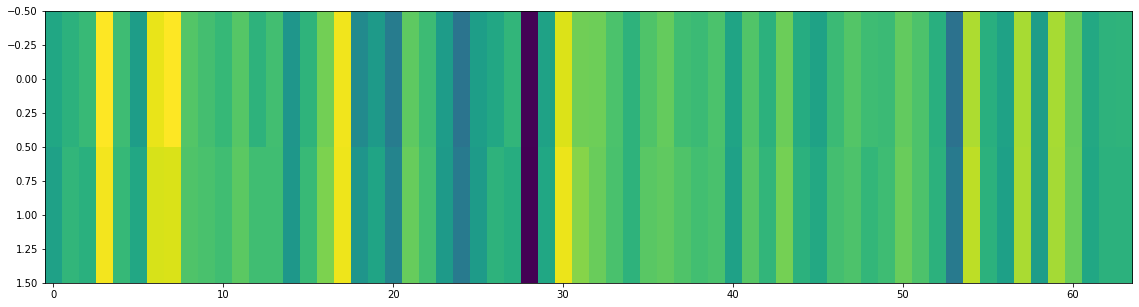

In [32]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

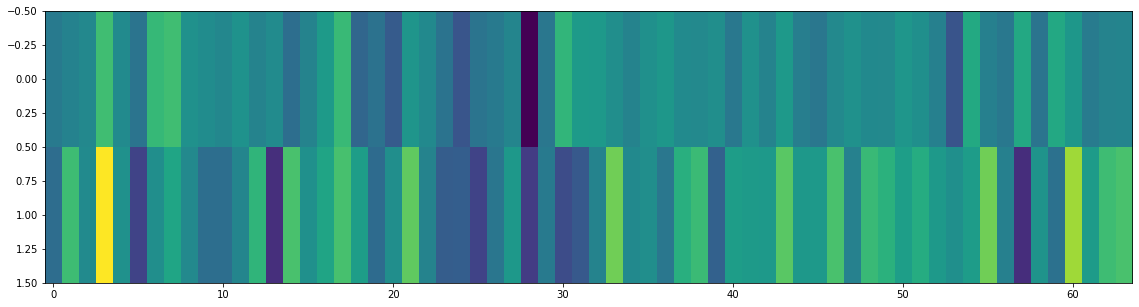

In [33]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between the mean of the first image batch and the two images.

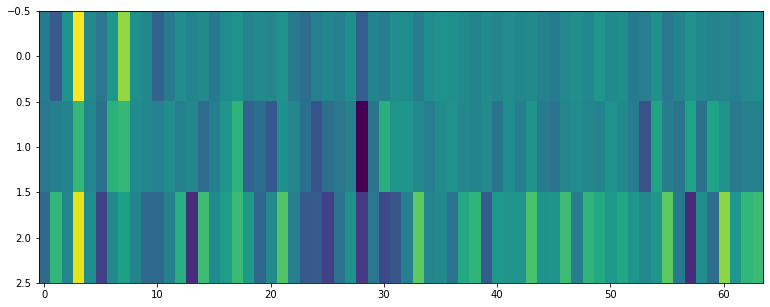

In [34]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [35]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0     -4.822863
1     -1.731350
2     -2.471052
3     10.090041
4     -1.253419
        ...    
59     5.850094
60     2.215208
61    -3.861985
62    -2.177066
63    -2.280950
Length: 64, dtype: float32

In [36]:
concat_img_compare[0].shape

(64,)

heat map cosine similarity between encoded images for entire batch vs batch

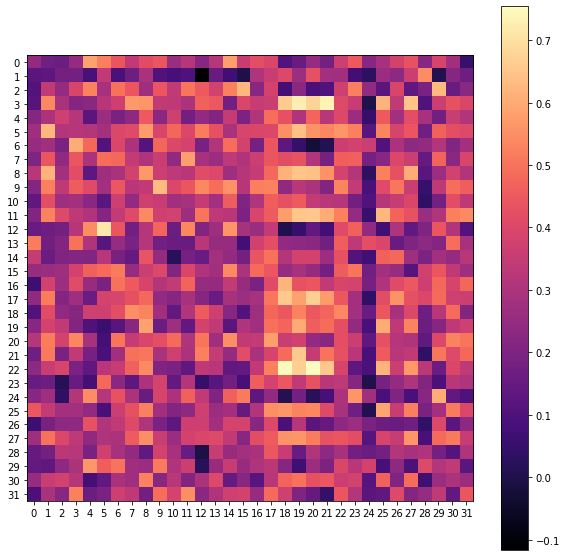

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

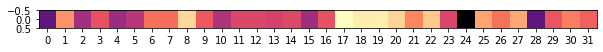

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [39]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.96087587]], dtype=float32)

In [63]:
a, b, c, d = sonufy.search_for_recommendations(query='tour de france', get_time_and_freq=True)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
a['name']

'Tour de France - 2009 Remaster'

In [65]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Shatter Prone,spotify:track:4L7U8TD7IUI2euqgpTvOsG,Glass Domain,0.677529,11,0.424683,0.742766
1,Money for Nothing,spotify:track:4yqtwO7MQIIXqoiRBPHAgR,Dire Straits,0.633709,65,0.485118,0.677367
2,Garota Dreadlock,spotify:track:6nsMxlrA2zN3fCaEwpQQra,Tribo De Jah,0.631350,44,0.203576,0.768010
3,我要陪著你老去,spotify:track:5vADYFqHU8N6zX7JhE0GJW,Peggy Hsu,0.630527,14,0.279954,0.784908
4,Desde Que Llegaste,spotify:track:4iuQ88fgaqBRkzb1JWKUbZ,Reyli Barba,0.602949,66,0.127521,0.786085
5,In a Lifetime - Remastered,spotify:track:6MXOP2futpG84fk4Oqou5Y,Clannad,0.602451,47,0.373004,0.757835
6,Vida,spotify:track:41fPYZa2fOSHLEG1gvtian,La Mafia,0.602426,56,0.589516,0.606811
7,After the Love Has Gone - Radio Mix,spotify:track:4g4eWSqKANb546ZN87t8mW,Damage,0.600072,34,0.161540,0.726569
8,On a Mission,spotify:track:2AGppDiHy8wbYCm9GE9tNI,The Skints,0.586093,33,0.230567,0.697790
9,Malarone,spotify:track:0WC0j1iLJRkb6P041h4jiU,Linea Aspera,0.585970,35,0.154182,0.776679


In [50]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

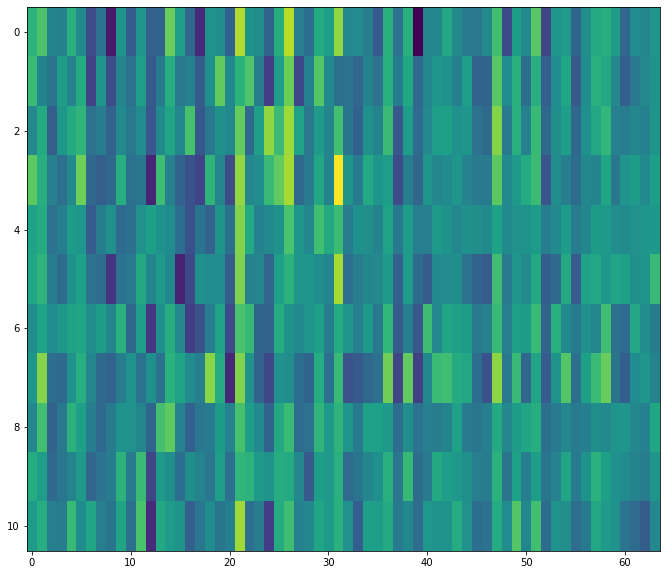

In [51]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.004158405638191757